## IJCAI-21

### Modelo BERT base-uncased

# Test com 10 datasets em inglês
### Usando os 4 melhores padrões do HypeNet-train

### Não usar mais SEP ou DOT

In [1]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import pandas as pd
sys.path.append("/home/gabrielescobar/hyper_bert")
import nb_utils
print("Iniciando!")
sns.set(style="whitegrid")
plt.clf()

path_json_normal = "../../en-model/bert-base-uncased_bert_score_normal_2020-11-12_15:13:01"
# path_json_dot = "../../en-model/bert-base-uncased_bert_score_dot_comb_2020-11-12_14:48:06"
# path_json_sep = "../../en-model/bert-base-uncased_bert_score_sep_comb_2020-11-12_14:48:36"

#local random
path_file_random = "../../en-model/bert-base-uncased_bert_score_2021-01-26_20:58:01/ENrandom.json"
df_random = nb_utils.create_dataframe(json.load(open(path_file_random)), separator="\t")

dfs = {}
pattern_unique = {}
dataset_lenMax = {}
filename = ""
p_filter = nb_utils.best_pattern_HypeNet_train_logz[0]
for filename in os.listdir(path_json_normal):
    if os.path.isfile(os.path.join(path_json_normal, filename)) and filename.endswith(".json"):
        df = nb_utils.create_dataframe(json.load(open(os.path.join(path_json_normal, filename))), combination=False, separator="\t")
        df['tipo'] = 'normal'
        dfs[filename + " normal"] = df
        dataset_lenMax[filename + " normal"] = df[df.pattern == p_filter]['len_total'].value_counts().max()
pattern_unique['normal'] = df['pattern'].unique().tolist()

len_total_unique = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]

df_ratios = []
for dataset_name in dfs.keys():
    print(dataset_name)
    dname, type_dataset = dataset_name.split()
    df_ratio = nb_utils.balanceamento(dfs[dataset_name], len_size=len_total_unique, patterns=pattern_unique[type_dataset])
    df_ratio['dataset'] = dname
    df_ratio['tipo'] = type_dataset
    df_ratios.append(df_ratio)
df_ratios = pd.concat(df_ratios, ignore_index=True)

for dataset_name, df in dfs.items():
    print(dataset_name)
    type_dataset = dataset_name.split()[-1]
    # dfs[dataset_name] = nb_utils.logsumexp_normalization(df, len_list=len_total_unique, pattern_list=pattern_unique[type_dataset])
    dfs[dataset_name] = nb_utils.logsumexp_random_logZ(df, len_list=len_total_unique, pattern_list=pattern_unique[type_dataset], df_random=df_random, fill_number=dataset_lenMax[dataset_name])


df_ratios['dataset_format'] = df_ratios['dataset'].map(nb_utils.get_dataset_names())
df_ratios['dataset_tipo'] = df_ratios['dataset_format'] + " " + df_ratios['tipo']
df_ratios['ratio_percent'] = df_ratios['ratio'] * 100
df_plot_lensubtoken = df_ratios[df_ratios['tipo'] == 'normal']


Iniciando!
wordnet_test.json normal
Balanceamento: [1, 14, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] não está no dataframe!
baroni2012.json normal
Balanceamento: [1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] não está no dataframe!
HypeNet_test.json normal
Balanceamento: [1, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] não está no dataframe!
Weeds.json normal
Balanceamento: [1, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] não está no dataframe!
kotlerman2010.json normal
Balanceamento: [1, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] não está no dataframe!
EVALution.json normal
Balanceamento: [1, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] não está no dataframe!
LenciBenotto.json normal
Balanceamento: [1, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] não

<Figure size 432x288 with 0 Axes>

# Test BERT - Log(Z) em 10 datasets inglês


### Gráficos descritivos dos datasets de test
 - % pares verdadeiros para cada tamanho de sub-token
 - Quantidade de pares por tamanho de sub-token

<Figure size 1440x576 with 0 Axes>

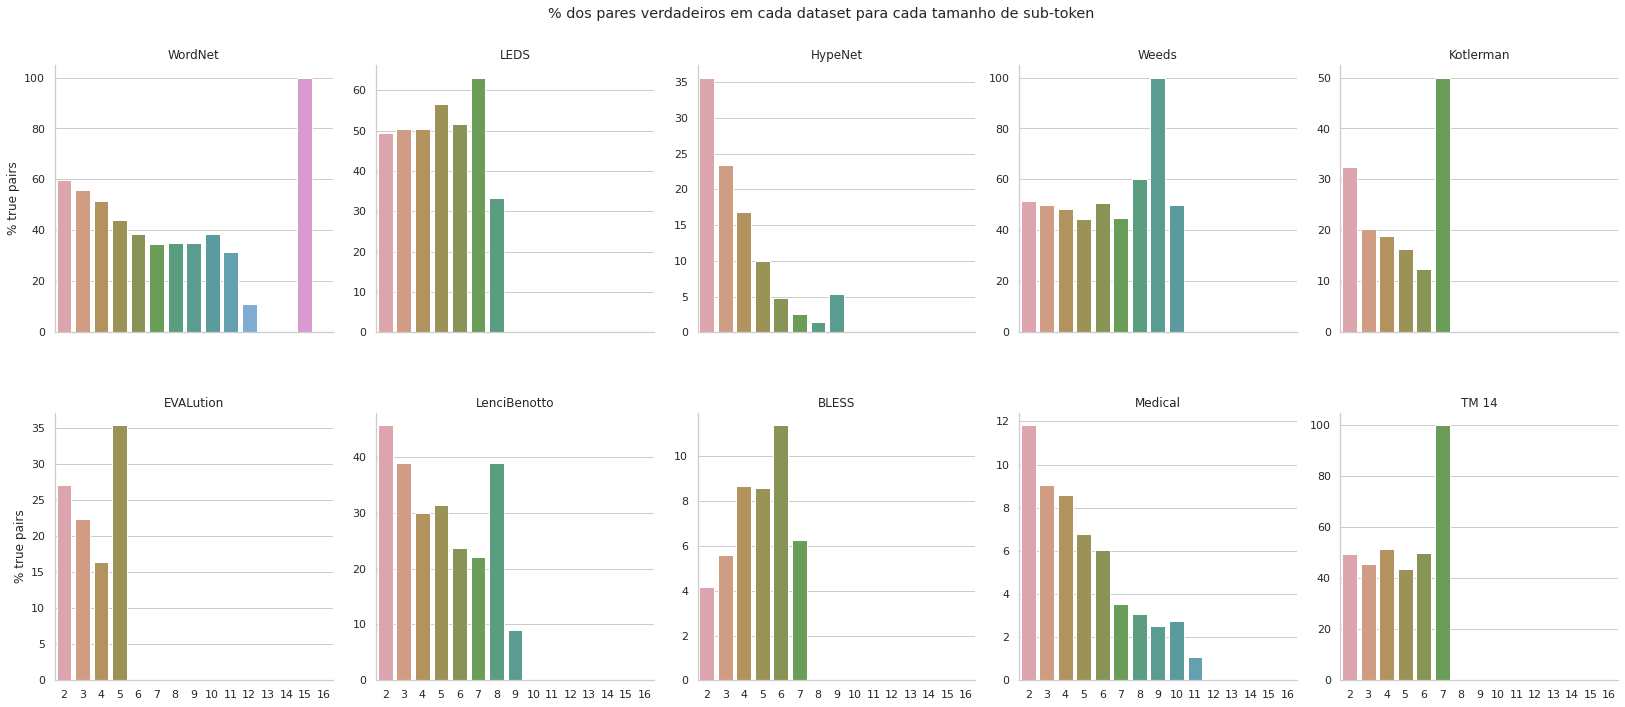

<Figure size 1440x576 with 0 Axes>

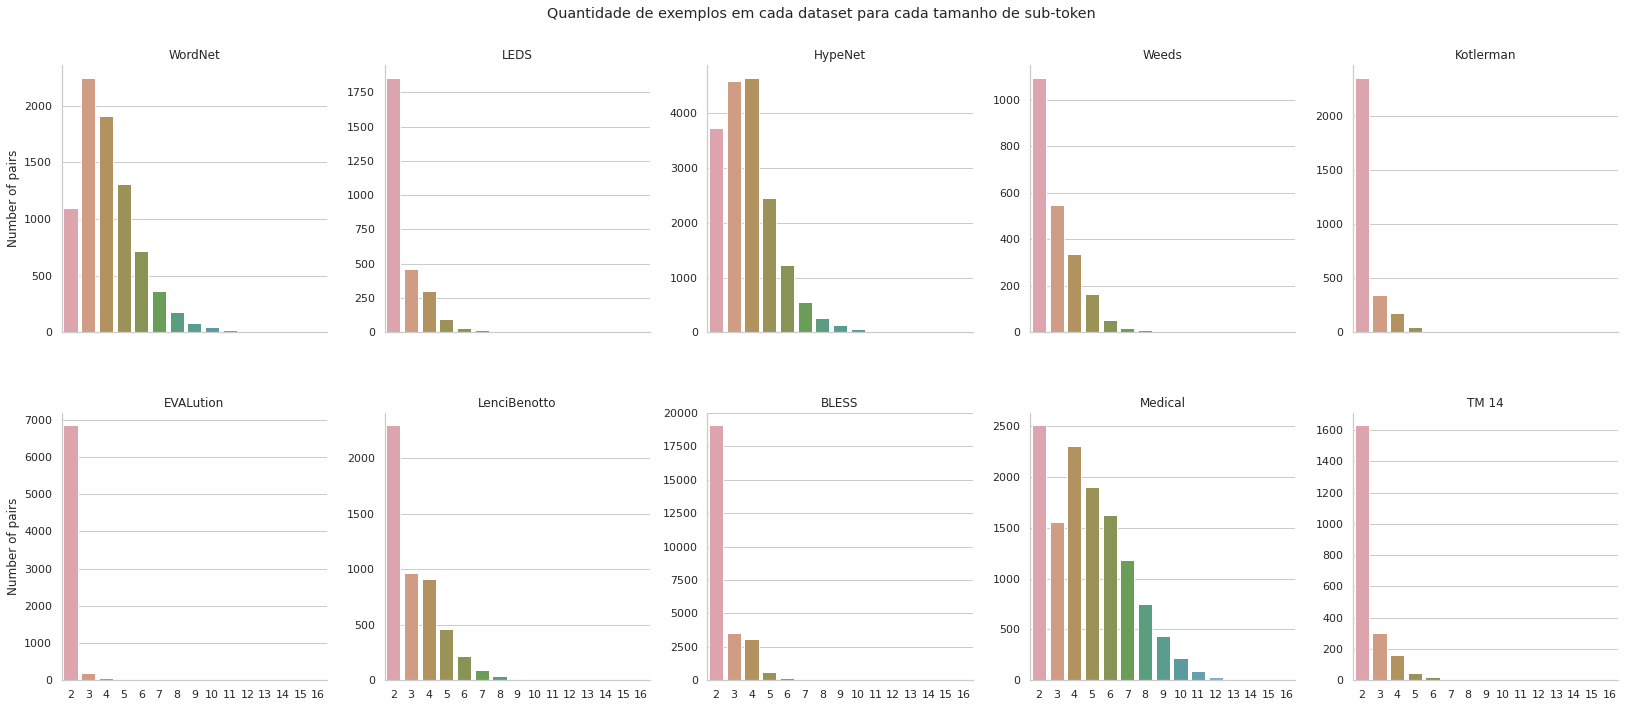

In [2]:
# % dos pares True por tamanho de subtoken
plt.figure(figsize=(20,8))
g = sns.catplot(x="len_total", y="ratio_percent", col="dataset_format", col_wrap=5,
                data=df_plot_lensubtoken, saturation=.5,
                kind="bar", ci=None, aspect=.9, sharey=False)
(g.set_axis_labels("", "% true pairs")
#   .set_xticklabels(["Men", "Women", "Children"])
  .set_titles("{col_name}")
  .despine(left=False))
plt.subplots_adjust(top=0.9, hspace=0.3)
_ = g.fig.suptitle('% dos pares verdadeiros em cada dataset para cada tamanho de sub-token')
# plt.savefig('num_true_por_subtoken.png', dpi=300)

plt.figure(figsize=(20,8))
# Quantidade de pares por tamanho de subtoken
df_ratios['total'] = df_ratios['true'] + df_ratios['false']
df_plot_lensubtoken = df_ratios[df_ratios['tipo'] == 'normal']


g = sns.catplot(x="len_total", y="total", col="dataset_format", col_wrap=5,
                data=df_plot_lensubtoken, saturation=.5,
                kind="bar", ci=None, aspect=.9, sharey=False)
(g.set_axis_labels("", "Number of pairs")
#   .set_xticklabels(["Men", "Women", "Children"])
  .set_titles("{col_name}")
  # .set(ylim=(0, 1))
  .despine(left=False))
plt.subplots_adjust(top=0.9, hspace=0.3)
_ = g.fig.suptitle('Quantidade de exemplos em cada dataset para cada tamanho de sub-token')
# plt.savefig('num_pair_por_subtoken.png', dpi=300)

In [11]:
df_en = []
dfs2 = []
best_pattern_train = nb_utils.best_pattern_HypeNet_train_logz
best_pattern_num_train = 1
for dataset_name in dfs.keys():
    dname, type_dataset = dataset_name.split()
    if type_dataset == 'normal':
        df_temp= nb_utils.compute_min_mean_ap_normal(dfs[dataset_name],
            pattern_list=best_pattern_train, dataset_name=dname, best_pattern_num=best_pattern_num_train)
        df_temp['tipo'] = 'normal'
        dfs2.append(df_temp)
        df_temp = nb_utils.compute_ap_bert_soma(dfs[dataset_name], pattern_list=best_pattern_train, dataset_name=dname,
                                                best_pattern_num=best_pattern_num_train, tipo=type_dataset)
        df_temp['tipo'] = "normal"
        dfs2.append(df_temp)
    else:
        raise KeyError

df_en = pd.concat(dfs2)


### Test
### AP para cada método (BERT, DIVE e Word2vec)

#### Usando BERT - Log(Z)

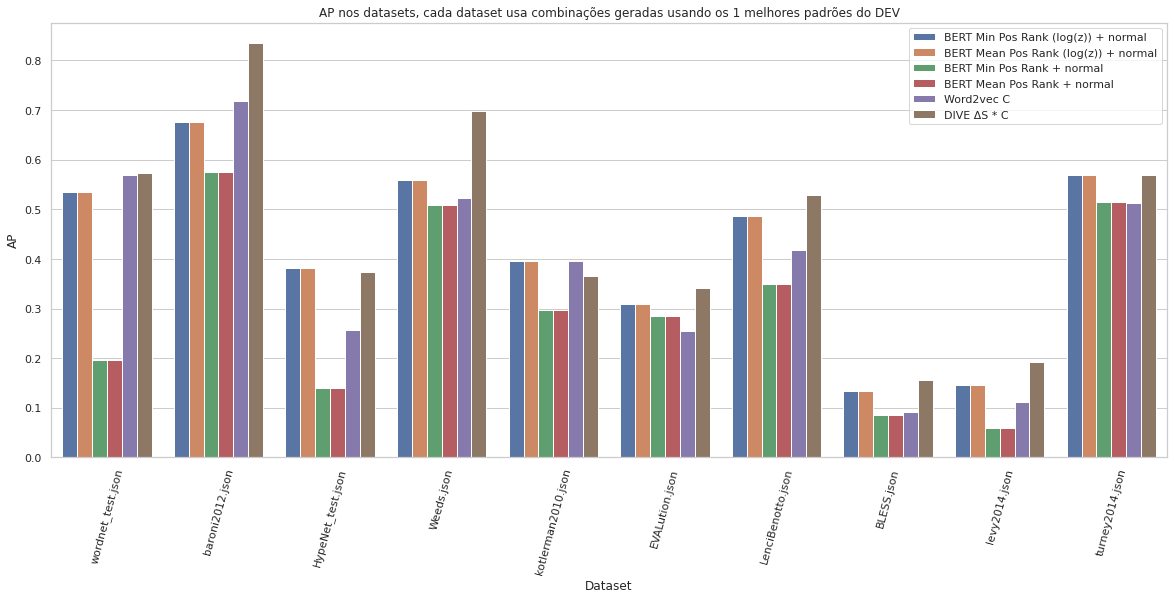

<Figure size 1440x576 with 0 Axes>

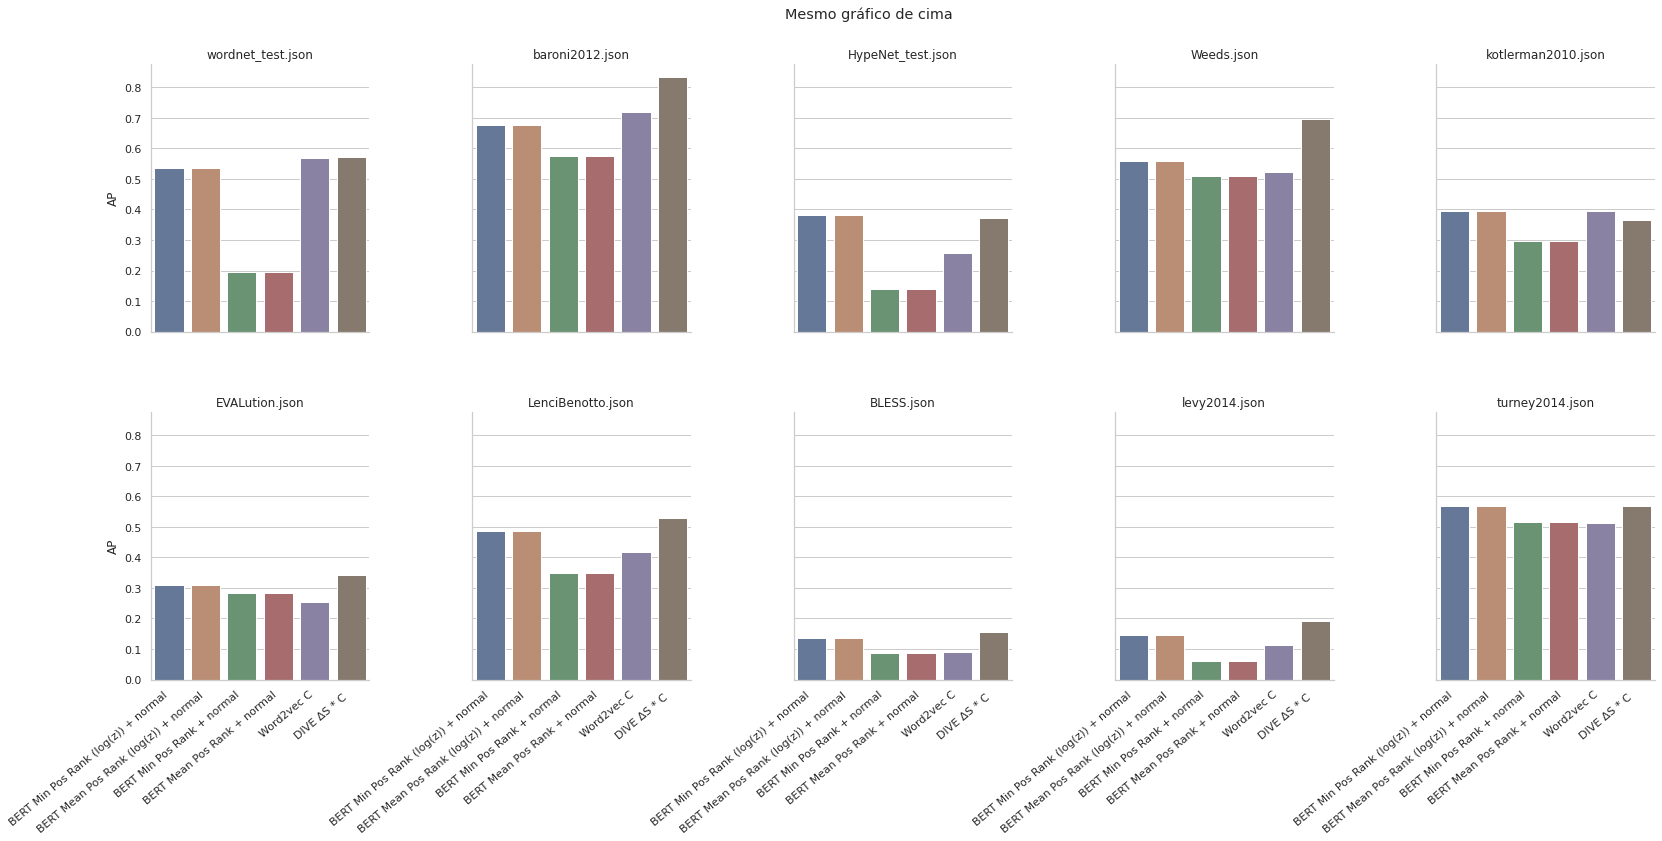

In [12]:
df_dive = nb_utils.get_df_dive()
df_dive['method_format_tipo'] = df_dive['method'].map(nb_utils.method_names)
# AP por método
df_en['method_format_tipo'] = df_en['method_format'] + " + " + df_en['tipo']
df_en = pd.concat([df_en, df_dive])
plt.figure(figsize=(20,8))
ax = sns.barplot(x='dataset' ,hue="method_format_tipo", y="AP", ci="sd",data=df_en)
ax.set(xlabel="Dataset")
ax.set_title(f"AP nos datasets, cada dataset usa combinações geradas usando os {best_pattern_num_train} melhores"
             f" padrões do DEV")
ax.legend(bbox_to_anchor=(1, 1))
legend = ax.get_legend()
_ = plt.xticks(rotation=75)


plt.figure(figsize=(20,8)) # this creates a figure 8 inch wide, 4 inch high
g = sns.catplot(x="method_format_tipo", y="AP", col="dataset", col_wrap=5,
                data=df_en, saturation=.5,
                kind="bar", ci="sd", aspect=.9, legend='full')
(g.set_axis_labels("", "AP")
    .set_xticklabels(rotation=40, ha="right")
    .set_titles("{col_name}"))
plt.subplots_adjust(top=0.9, hspace=0.3)
_ = g.fig.suptitle('Mesmo gráfico de cima')

#### Dados dos gráficos acima. Apenas para visualizar mesmo!
 - Quantidade de pares e balanceamento em cada dataset
 - AP arredondando 4 casas decimais

In [13]:
# print contagem
df_print = df_ratios.groupby(['dataset', 'tipo']).sum()[['true', 'false', 'total']]
df_print['ratio'] = df_print['true'] / df_print['total']
print(df_print)

# df to csv
df_en['dataset_format'] = df_en['dataset'].map(nb_utils.get_dataset_names())
group_list = ['dataset_format', 'tipo','method_format_tipo', 'AP', 'N', 'hyper_num']
df_csv = df_en[group_list]
df_csv = df_csv.sort_values(by=group_list[:2])
df_csv['AP'] = df_csv['AP'].round(4)
table = pd.pivot_table(df_csv, values='AP', index="dataset_format", columns=['method_format_tipo'])
print(table)
table.to_csv("bert_randompairs.csv",index=True)

                           true  false  total     ratio
dataset            tipo                                
BLESS.json         normal  1337  25195  26532  0.050392
EVALution.json     normal  1911   5196   7107  0.268890
HypeNet_test.json  normal  3512  14158  17670  0.198755
LenciBenotto.json  normal  1933   3077   5010  0.385828
Weeds.json         normal  1119   1114   2233  0.501120
baroni2012.json    normal  1385   1385   2770  0.500000
kotlerman2010.json normal   880   2060   2940  0.299320
levy2014.json      normal   945  11657  12602  0.074988
turney2014.json    normal  1058   1100   2158  0.490269
wordnet_test.json  normal  3994   3996   7990  0.499875
method_format_tipo  BERT Mean Pos Rank (log(z)) + normal  \
dataset_format                                             
BLESS                                             0.1348   
EVALution                                         0.3094   
HypeNet                                           0.3813   
Kotlerman                   


usar Average e min normal.